In [66]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date as dt
import plotly.express as px  
import plotly.graph_objects as go  
import warnings
warnings.filterwarnings('ignore')

In [67]:
# defining the Dataframe
df = pd.read_csv('Zomato Dataset.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [69]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

# **Preprocessing/Data Cleaning/EDA***

In [70]:
# Lowering all the columns so there is no typo while mentioning column names
df.columns = [col.lower() for col in df.columns]
df.rename(columns = {'time_taken (min)' : 'time_taken_min'}, inplace = True)

In [71]:
df.shape

(45584, 20)

In [72]:
df.isnull().sum()/len(df)*100

id                             0.000000
delivery_person_id             0.000000
delivery_person_age            4.067217
delivery_person_ratings        4.185679
restaurant_latitude            0.000000
restaurant_longitude           0.000000
delivery_location_latitude     0.000000
delivery_location_longitude    0.000000
order_date                     0.000000
time_orderd                    3.797385
time_order_picked              0.000000
weather_conditions             1.351351
road_traffic_density           1.318445
vehicle_condition              0.000000
type_of_order                  0.000000
type_of_vehicle                0.000000
multiple_deliveries            2.178396
festival                       0.500176
city                           2.632503
time_taken_min                 0.000000
dtype: float64

In [73]:
import pandas as pd
import math

# Function to calculate distance using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    
    # Differences in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distance in kilometers
    distance = R * c
    return distance

# Example DataFrame




# Apply haversine function row by row
df['distance'] = df.apply(
    lambda row: haversine(
        row['restaurant_longitude'], row['restaurant_latitude'],
        row['delivery_location_longitude'], row['delivery_location_latitude']
    ), axis=1
)

# Check the result
df


,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,...,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min,distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,...,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,1.489846
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,...,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,11.007735
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,...,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,4.657195
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,...,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,6.232393


In [74]:
def distance_category(distance):
    if distance <= 2:
        return 'Very Short'
    elif distance <= 5:
        return 'Short'
    elif distance <= 10:
        return 'Medium'
    elif distance <= 20:
        return 'Long'
    else:
        return 'Very Long'

df['distance_category'] = df['distance'].apply(distance_category)


In [75]:
df.columns

Index(['id', 'delivery_person_id', 'delivery_person_age',
       'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'order_date', 'time_orderd',
       'time_order_picked', 'weather_conditions', 'road_traffic_density',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city', 'time_taken_min', 'distance',
       'distance_category'],
      dtype='object')

In [76]:
# Define the mapping from categorical labels to integers
distance_mapping = {
    'Very Short': 0,
    'Short': 1,
    'Medium': 2,
    'Long': 3,
    'Very Long': 4
}

# Apply the mapping to the 'distance_category' column
df['distance_category'] = df['distance_category'].replace(distance_mapping)

# Ensure the new column is of integer type



In [77]:
df['distance_category'].isnull().sum()

0

In [78]:
df.describe()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,vehicle_condition,multiple_deliveries,time_taken_min,distance,distance_category
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000,45584.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963,99.321320,2.165716
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298,1099.839139,1.068217
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000,1.465067,0.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000,4.663493,1.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000,9.264356,2.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000,13.763977,3.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000,19692.674606,4.000000


<Axes: >

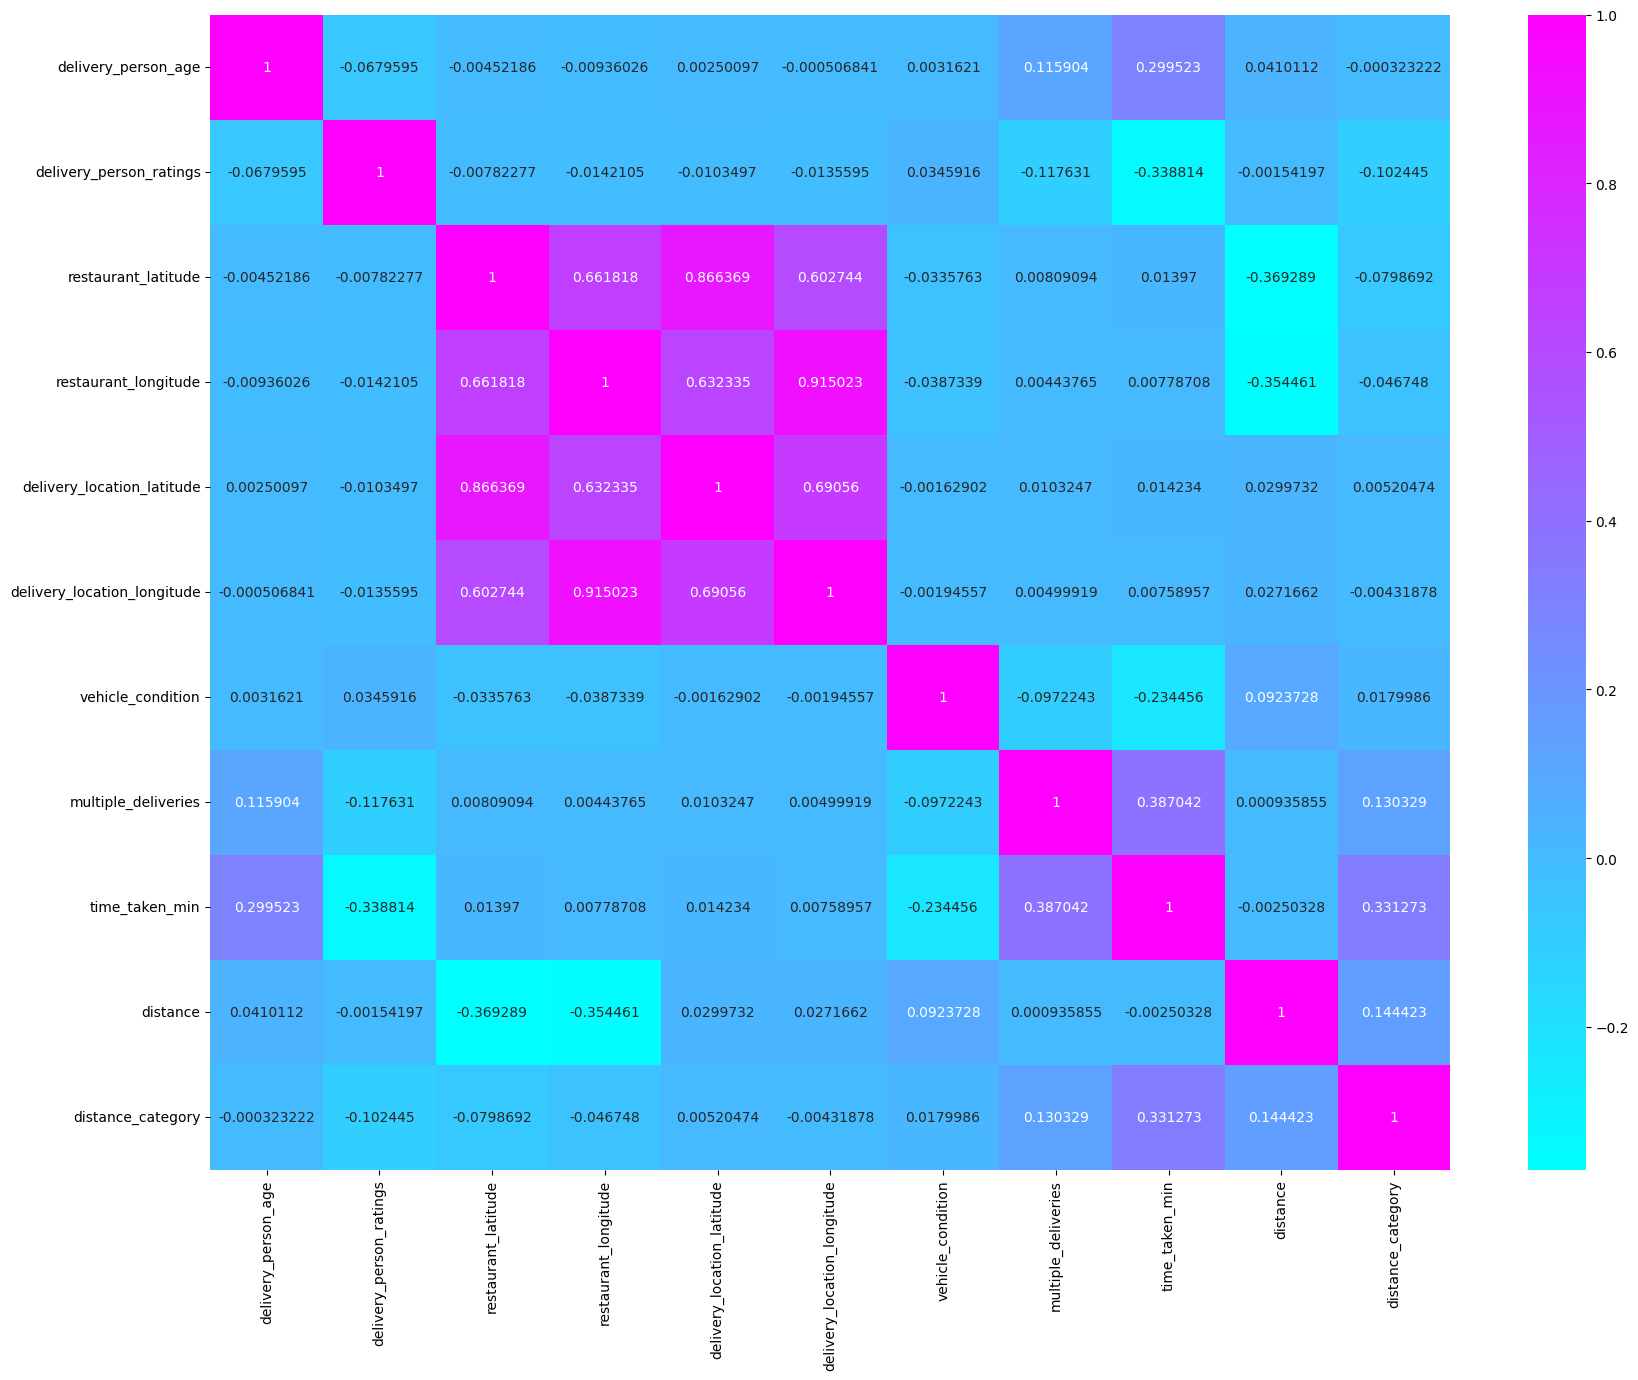

In [79]:
plt.figure(figsize=(20,15))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,fmt='g', cmap='cool')


<Figure size 2000x1500 with 0 Axes>

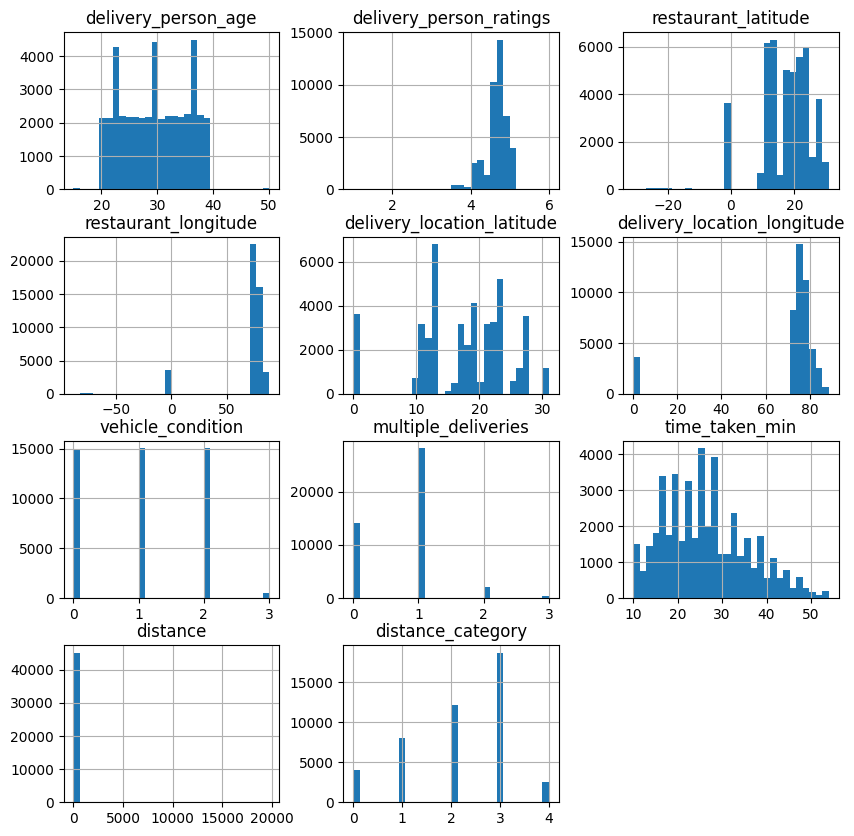

In [80]:
plt.figure(figsize=(20,15))
df.hist(bins=30,figsize=(10,10))
plt.show()

<Axes: >

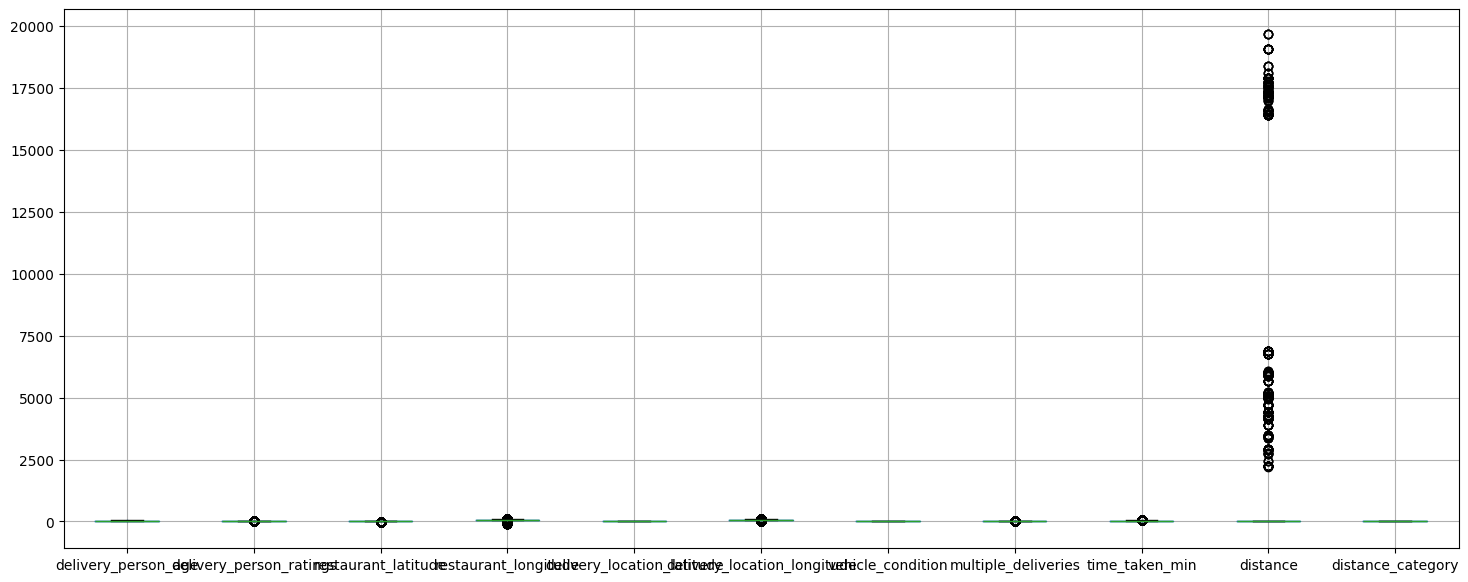

In [81]:
plt.figure(figsize=(18,7))
df.boxplot()

In [82]:
# Droping all null values as they all are less than 1%
Cl_df=df.dropna(inplace = True , axis=0)

In [83]:
df.isnull().sum()

id                             0
delivery_person_id             0
delivery_person_age            0
delivery_person_ratings        0
restaurant_latitude            0
restaurant_longitude           0
delivery_location_latitude     0
delivery_location_longitude    0
order_date                     0
time_orderd                    0
time_order_picked              0
weather_conditions             0
road_traffic_density           0
vehicle_condition              0
type_of_order                  0
type_of_vehicle                0
multiple_deliveries            0
festival                       0
city                           0
time_taken_min                 0
distance                       0
distance_category              0
dtype: int64

In [84]:
# Removing duplicates rows
duplicates = df[df.duplicated(subset=['delivery_person_id', 'order_date', 'time_orderd'])]
df.drop_duplicates(subset = ['delivery_person_id', 'order_date', 'time_orderd'], inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41247 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           41247 non-null  object 
 1   delivery_person_id           41247 non-null  object 
 2   delivery_person_age          41247 non-null  float64
 3   delivery_person_ratings      41247 non-null  float64
 4   restaurant_latitude          41247 non-null  float64
 5   restaurant_longitude         41247 non-null  float64
 6   delivery_location_latitude   41247 non-null  float64
 7   delivery_location_longitude  41247 non-null  float64
 8   order_date                   41247 non-null  object 
 9   time_orderd                  41247 non-null  object 
 10  time_order_picked            41247 non-null  object 
 11  weather_conditions           41247 non-null  object 
 12  road_traffic_density         41247 non-null  object 
 13  vehicle_condition    

In [86]:
if 'order_date' in df.columns:
    df['Order_month'] = pd.DatetimeIndex(df['order_date']).month
else:
    print("Column 'order_date' does not exist in the DataFrame.")


In [87]:
# Ensure the column is in string format
df['time_orderd'] = df['time_orderd'].astype(str)
df['time_order_picked'] = df['time_order_picked'].astype(str)

# Apply regex to filter valid time formats
valid_format = df['time_orderd'].str.match(r'\d{1,2}:\d{2}')
df = df[valid_format]

valid_format1 = df['time_order_picked'].str.match(r'(0[0-9]|1[0-9]|2[0-3]):[0-5][0-9]')
df = df[valid_format1]


In [88]:
# Now converting time_orderd and time_order_picked into time type
df['time_orderd'] = pd.to_datetime(df['time_orderd'], format = '%H:%M')

df['time_order_picked'] = pd.to_datetime(df['time_order_picked'], format = '%H:%M')

In [89]:
# Making a new column 'pickup_time' in mintues unit to show the total time between time orderd and time_order_picked
df['pickup_time'] = df['time_order_picked']  - df['time_orderd'] 
df['pickup_time'] = df['pickup_time'].dt.total_seconds()/60

In [90]:
# 1% null values coming in df['pickup_time'] column so dropping them.
df['pickup_time'].isnull().sum()/df.size*100
df.dropna(inplace= True)

In [91]:
df['pickup_time']

0        15.0
1        10.0
2        10.0
3        10.0
4        15.0
         ... 
45578    10.0
45579    10.0
45580    15.0
45582     5.0
45583     5.0
Name: pickup_time, Length: 33315, dtype: float64

In [92]:
df.columns

Index(['id', 'delivery_person_id', 'delivery_person_age',
       'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'order_date', 'time_orderd',
       'time_order_picked', 'weather_conditions', 'road_traffic_density',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city', 'time_taken_min', 'distance',
       'distance_category', 'Order_month', 'pickup_time'],
      dtype='object')

In [93]:
df['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    21054
0.0    10454
2.0     1534
3.0      273
Name: count, dtype: int64

<Axes: xlabel='multiple_deliveries'>

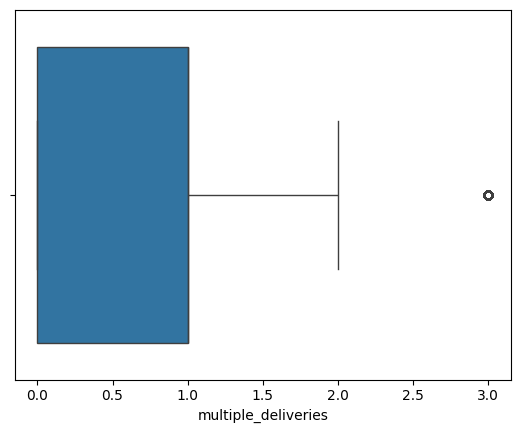

In [94]:
# Checking for outliers for each column:
sns.boxplot(x = 'multiple_deliveries', data = df)

<Axes: >

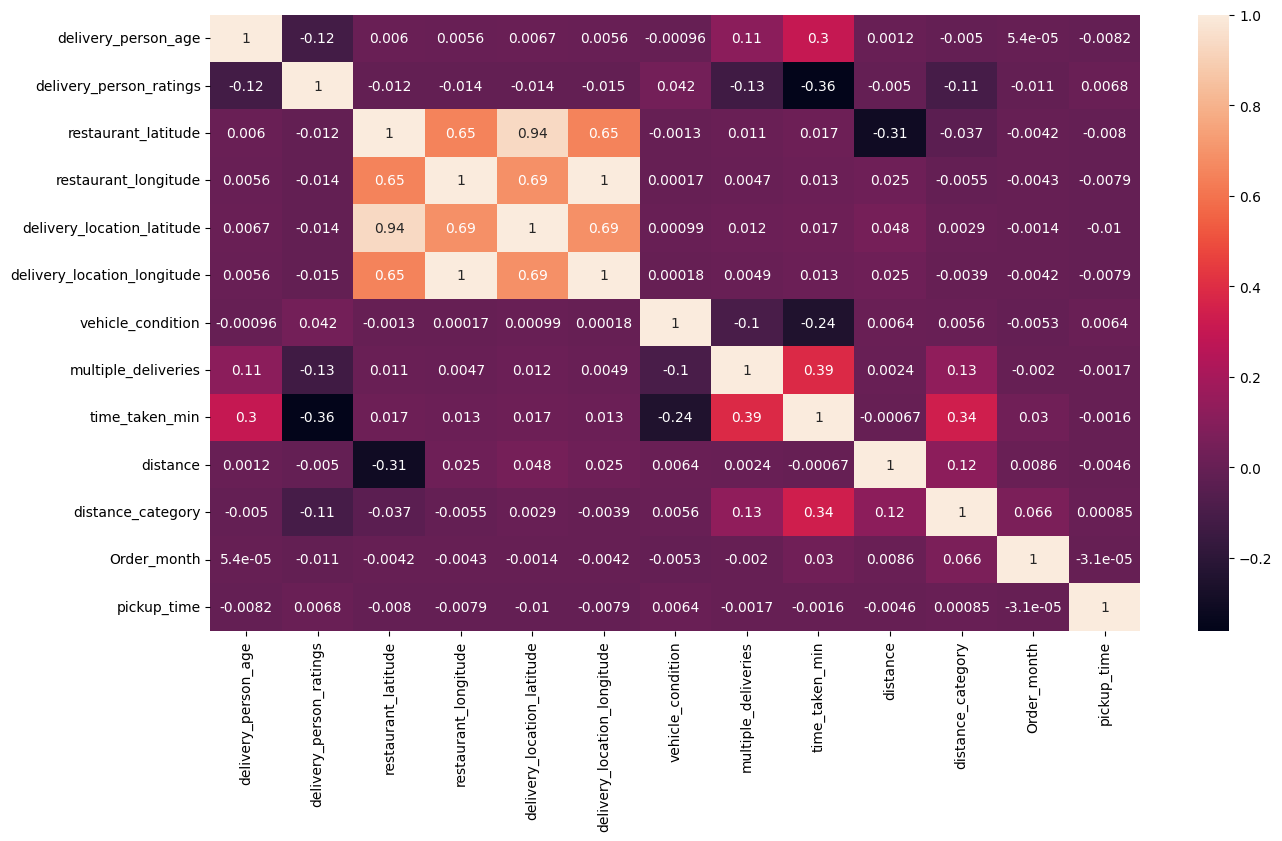

In [95]:
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


In [96]:
# Dropping rows which are of no signifance
df.drop(['id', 'delivery_person_id', 'restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 
          'delivery_location_longitude', 'time_orderd', 'time_order_picked', 'type_of_order', 
         'order_date','distance','pickup_time'], axis =1, inplace = True)

In [97]:
# Feature encoding on categorical columns
one_hot_col = ['weather_conditions', 'festival', 'city']
label_en_col = ['road_traffic_density', ]

In [98]:
from sklearn.preprocessing import LabelEncoder
available_cols = [col for col in one_hot_col if col in df.columns]


In [99]:
le=LabelEncoder()
for col in available_cols:
    df[col]=le.fit_transform(df[col])

In [100]:
df['type_of_vehicle']=df['type_of_vehicle'].replace({'motorcycle':0, "scooter":1, "electric_scooter":2})

            


In [101]:
# Transforming road_traffic_density to labels
def label_encod(x):
    if x == 'Jam':
        return 4
    elif x == 'High':
        return 3
    elif x == 'Medium':
        return 2
    else:
        return 1

df['road_traffic_density'] = df['road_traffic_density'].apply(label_encod)   

<Axes: >

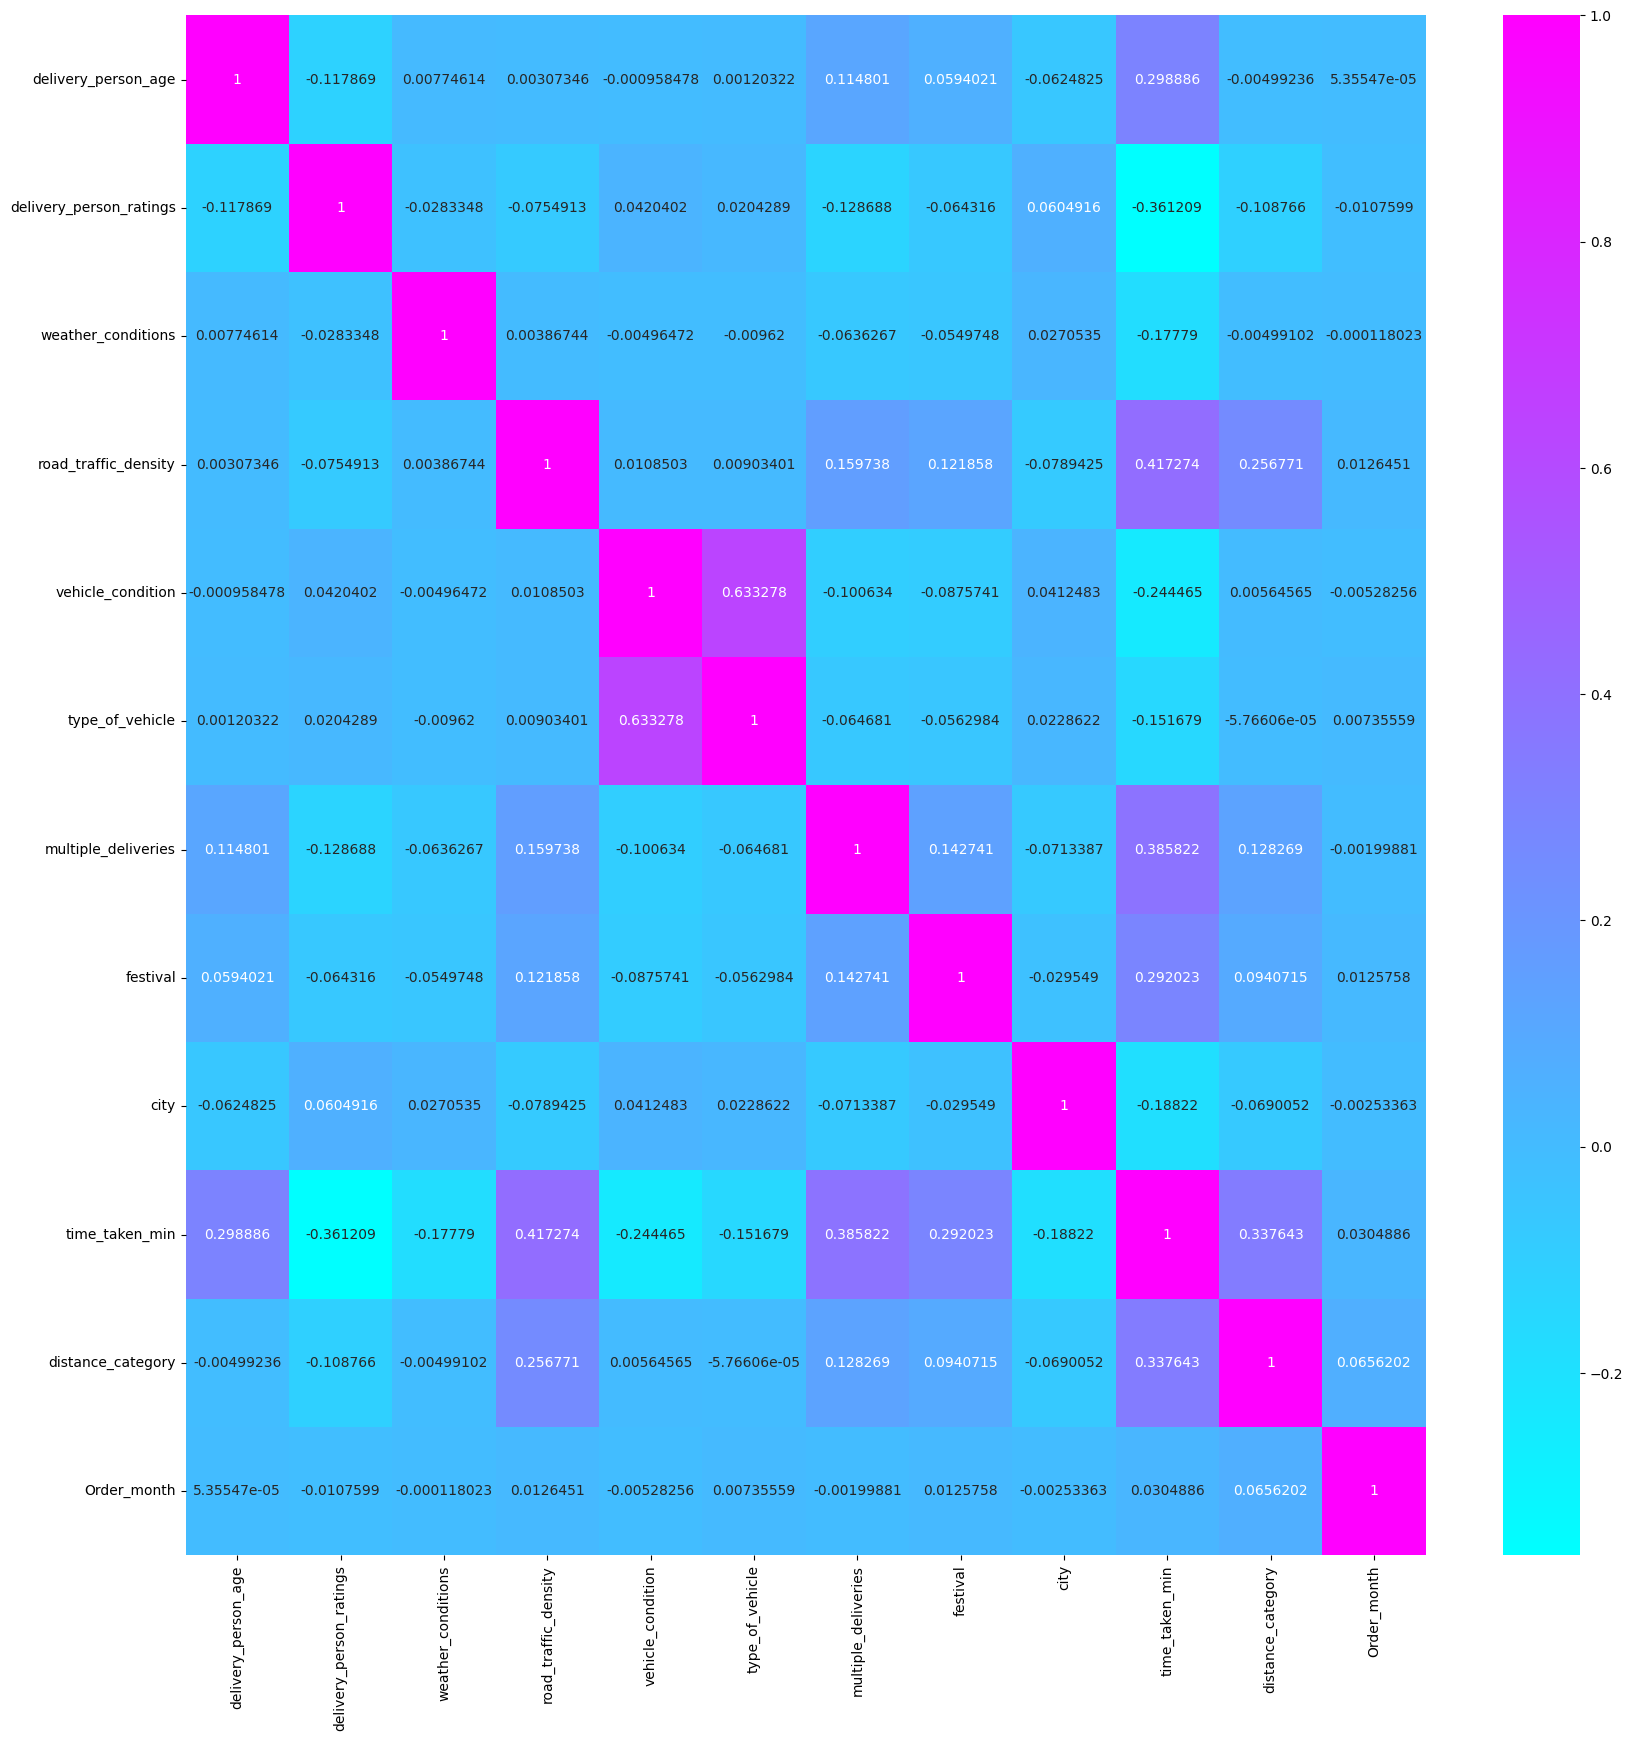

In [102]:
# Using heatmap to view correlation
plt.figure(figsize = (20,20))

sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,fmt='g',cmap = 'cool')



# **Spilitting data into train and test**

In [103]:
X= df.drop(columns=['time_taken_min', 'Order_month'], axis=1)
Y = df['time_taken_min']


<Axes: >

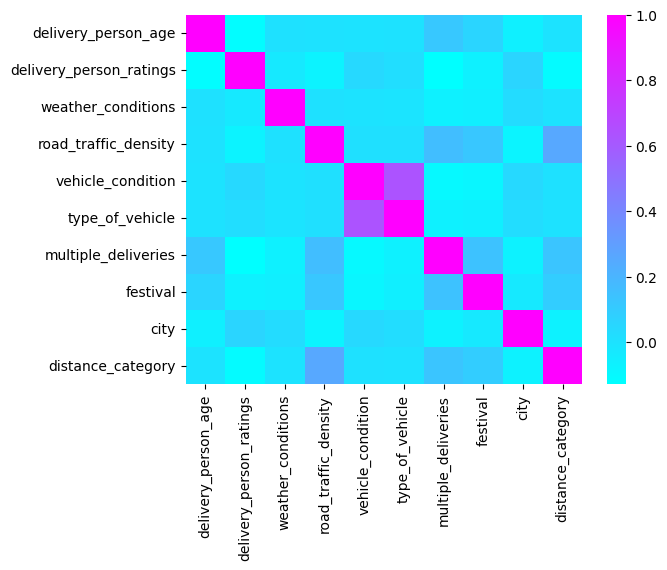

In [104]:
sns.heatmap(X.corr(),cmap='cool')

In [105]:
df['type_of_vehicle'].value_counts()

type_of_vehicle
0    19619
1    11003
2     2693
Name: count, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33315 entries, 0 to 45583
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delivery_person_age      33315 non-null  float64
 1   delivery_person_ratings  33315 non-null  float64
 2   weather_conditions       33315 non-null  int32  
 3   road_traffic_density     33315 non-null  int64  
 4   vehicle_condition        33315 non-null  int64  
 5   type_of_vehicle          33315 non-null  int64  
 6   multiple_deliveries      33315 non-null  float64
 7   festival                 33315 non-null  int32  
 8   city                     33315 non-null  int32  
 9   time_taken_min           33315 non-null  int64  
 10  distance_category        33315 non-null  int64  
 11  Order_month              33315 non-null  int32  
dtypes: float64(3), int32(4), int64(5)
memory usage: 2.8 MB


In [107]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(X)

In [108]:
#split the data into training and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size =0.20, random_state = 42)

# ****Choosing the Best Model using Lazypredict

In [109]:
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
'''from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(predictions = True)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
models'''

'from lazypredict.Supervised import LazyRegressor\nreg = LazyRegressor(predictions = True)\nmodels, predictions = reg.fit(x_train, x_test, y_train, y_test)\nmodels'

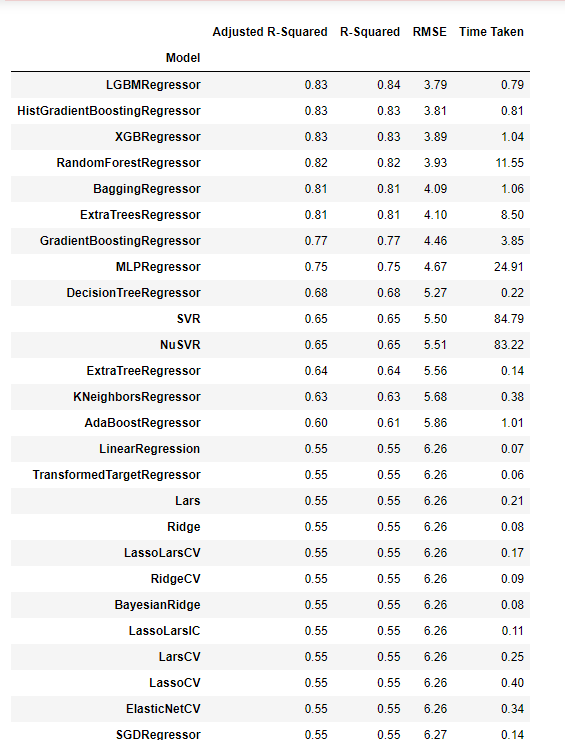


# ****Model 1: LGBM Regressor

In [111]:
# Implementing LGBM Regressor Model
from sklearn.metrics import mean_squared_error as mse
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor(metric = 'rmse')
model_lgbm.fit(x_train, y_train)

y_train_predict = model_lgbm.predict(x_train)
y_test_predict = model_lgbm.predict(x_test)

training_rmse = np.sqrt(mse(y_train_predict, y_train))
test_rmse = np.sqrt(mse(y_test_predict, y_test))

print(training_rmse)
print(test_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 26652, number of used features: 10
[LightGBM] [Info] Start training from score 26.566899
3.6039555105969567
3.7974684663480414


In [112]:
model_lgbm.score(x_test, y_test)


0.8375395704119002

In [113]:
# Measuring R2 for LGBM Regressor
from sklearn.metrics import r2_score
print('training R2 score :', r2_score(y_train_predict, y_train))
print('testing R2 score: ', r2_score(y_test_predict, y_test))

training R2 score : 0.8189111655081194
testing R2 score:  0.8035499721295689


# ****Model 2: RandomForest

In [114]:
# Implementing Random Forest
from sklearn.ensemble import RandomForestRegressor
#for max_depth > 13, the model is overfitting so we'll take max_depth = 13 to control overfitting.
rf = RandomForestRegressor(n_estimators=200,random_state=15, max_depth=13)
rf.fit(x_train, y_train)

y_train_predict = rf.predict(x_train)
y_test_predict = rf.predict(x_test)

training_rmse_rf = np.sqrt(mse(y_train_predict, y_train))
test_rmse_rf = np.sqrt(mse(y_test_predict, y_test))

print(training_rmse_rf)
print(test_rmse_rf)

3.062068075242775
3.8386380685693284


In [115]:
y_predictor=rf.predict(x_test)
r2_score(y_predictor,y_test)

0.8083827544387767

In [116]:
# Measuring R2 for RandomForest
from sklearn.metrics import r2_score
print('training R2 score for RF:', r2_score(y_train_predict, y_train))
print('testing R2 score for RF: ', r2_score(y_test_predict, y_test))

training R2 score for RF: 0.8753358549377303
testing R2 score for RF:  0.8083827544387767


In [117]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, Y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores.mean())


Cross-validated R² scores: 0.8386889980637878


In [118]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_lgbm, X, Y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores.mean())


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 26652, number of used features: 10
[LightGBM] [Info] Start training from score 26.582395
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 26652, number of used features: 10
[LightGBM] [Info] Start training from score 26.622317
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

**Random Forest is giving us better results with Hyperparameter tuning**

In [ ]:
import pickle
zomato_model = pickle.dumps(model_lgbm)

In [120]:
import pickle

with open('model_lgbm.pkl', 'wb') as file:
    pickle.dump(model_lgbm, file)


In [121]:
import shutil

shutil.move('model_lgbm.pkl', '/kaggle/working/model_lgbm.pkl')



FileNotFoundError: [WinError 3] The system cannot find the path specified